In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q -U livelossplot

In [ ]:
# Imports
import gdown
import os
import json
import csv   
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import scipy.misc
import sklearn
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import tensorflow.keras.layers.experimental.preprocessing as keras_preproc
#import kerastuner as kt
import keras
import io
import json
import pandas as pd
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
import itertools
import numpy as np
import os, shutil
from datetime import datetime
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from collections import Counter
import random
from keras.models import model_from_json
from livelossplot import PlotLossesKeras
from keras.callbacks import CSVLogger

In [ ]:
EVALUATION_IMAGES_PATH = 'evaluation_train_images/'
EVALUATION_LABELS_PATH = 'evaluation_train_data.csv'
TEST_IMAGES_PATH = 'test_images/'
TEST_LABELS_PATH = 'test_data.csv'

LABEL_TO_DISEASE_MAP_PATH = 'label_num_to_disease_map.json'
CONFUSION_MATRICES_PATH = '/content/drive/MyDrive/ml_project/confusion_matrices/'
MODEL_CP_PATH = '/content/drive/MyDrive/ml_project/models/'
LOGS_PATH = '/content/drive/MyDrive/ml_project/logs'
FINAL_MODEL_PATH = '/content/drive/MyDrive/ML Project VU/models/'


N_CLASSES = 5

# Images
IMG_SIZE = 224
SIZE = (IMG_SIZE,IMG_SIZE)
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Training
EPOCHS_TO_TRAIN = 30
BATCH_SIZE = 32

In [ ]:
os.chdir('/content/')

if not os.path.exists(LABEL_TO_DISEASE_MAP_PATH):
  !wget files.brainfriz.com/ml_project/label_num_to_disease_map.json

if not os.path.exists(EVALUATION_IMAGES_PATH):
  !wget files.brainfriz.com/ml_project/evaluation_data.rar
  
if not os.path.exists('/content/drive/MyDrive/ml_project/'):
  !mkdir /content/drive/MyDrive/ml_project
  
if not os.path.exists(CONFUSION_MATRICES_PATH):
  !mkdir /content/drive/MyDrive/ml_project/confusion_matrices #for the confusion matrix images

if not os.path.exists(MODEL_CP_PATH):
  !mkdir /content/drive/MyDrive/ml_project/models # for saved models

--2021-03-26 19:59:51--  http://files.brainfriz.com/ml_project/label_num_to_disease_map.json
Resolving files.brainfriz.com (files.brainfriz.com)... 138.201.201.196
Connecting to files.brainfriz.com (files.brainfriz.com)|138.201.201.196|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.brainfriz.com/ml_project/label_num_to_disease_map.json [following]
--2021-03-26 19:59:51--  https://files.brainfriz.com/ml_project/label_num_to_disease_map.json
Connecting to files.brainfriz.com (files.brainfriz.com)|138.201.201.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172 [application/json]
Saving to: ‘label_num_to_disease_map.json’

label_num_to_diseas 100%[===================>]     172  --.-KB/s    in 0s      

2021-03-26 19:59:52 (28.1 MB/s) - ‘label_num_to_disease_map.json’ saved [172/172]

--2021-03-26 19:59:52--  http://files.brainfriz.com/ml_project/evaluation_data.rar
Resolving files.brainfriz.com (files.br

In [ ]:
!unrar x evaluation_data.rar > /dev/null

In [ ]:
# Dataset
train_data = pd.read_csv(EVALUATION_LABELS_PATH)
test_data = pd.read_csv(TEST_LABELS_PATH)

f = open(LABEL_TO_DISEASE_MAP_PATH)
label_class_name = json.load(f)
label_class_name = {int(k):v for k,v in label_class_name.items()}

train_data['class_name'] = train_data.label.map(label_class_name)
test_data['class_name'] = test_data.label.map(label_class_name)

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_gen = train_datagen.flow_from_dataframe(train_data,
                                directory = EVALUATION_IMAGES_PATH,
                                x_col = 'image_id',
                                y_col = 'class_name',
                                color_mode='rgb',
                                class_mode='categorical',
                                target_size = SIZE,
                                shuffle = False,
                                batch_size = BATCH_SIZE)

test_gen = test_datagen.flow_from_dataframe(test_data,
                                directory = TEST_IMAGES_PATH,
                                x_col = 'image_id',
                                y_col = 'class_name',
                                color_mode='rgb',
                                class_mode='categorical',
                                target_size = SIZE,
                                shuffle = False,
                                batch_size = BATCH_SIZE)

Found 64790 validated image filenames belonging to 5 classes.
Found 1000 validated image filenames belonging to 5 classes.


In [ ]:
# model_names = ["densenet", "efficientnet", "mobilenet", "resnet"]
# models = []

def get_final_model_input(models, data_gen):
  predictions = []

  for current_model in models:
    train_predictions.append(current_model.predict(data_gen))
  
  x_test = []

  for i in range(len(data_gen.classes)):
    new_row = []
    for prediction in test_predictions:
      new_row.append(prediction[i])
    x_test.append(new_row)
  
  return np.array(x_test)


# model.predict(x_train.reshape(-1, 20))



# for model_name in model_names:
#   json_file = open(FINAL_MODEL_PATH + model_name + '/models/evaluation_model.json', 'r')
#   loaded_model_json = json_file.read()
#   json_file.close()
#   model = model_from_json(loaded_model_json)
#   model.load_weights(FINAL_MODEL_PATH + model_name + '/models/evaluation_model.h5')
#   models.append(model)

# train_predictions = [] 
# test_predictions = []

# y_train = train_gen.classes
# y_test = test_gen.classes

In [ ]:
x = get_final_model_input(models, test_gen)

In [ ]:
model.predict(x.reshape(-1,20))

array([[0.21027403, 0.1914634 , 0.18311295, 0.18766162, 0.227488  ],
       [0.24720211, 0.19412266, 0.16463666, 0.19632445, 0.19771408],
       [0.21311261, 0.2242655 , 0.18189794, 0.19115122, 0.18957272],
       ...,
       [0.20064457, 0.19512723, 0.18812554, 0.18815427, 0.22794841],
       [0.18650405, 0.1966605 , 0.19932531, 0.2006506 , 0.21685953],
       [0.22903569, 0.19595307, 0.17191538, 0.19402972, 0.20906618]],
      dtype=float32)

In [ ]:
models

In [ ]:
# load models and get their predictions



In [ ]:
for current_model in models:
  train_predictions.append(current_model.predict(train_gen))
  test_predictions.append(current_model.predict(test_gen))

In [ ]:
x_test = []

for i in range(1000):
  new_row = []
  for prediction in test_predictions:
    new_row.append(prediction[i])
  x_test.append(new_row)
x_test = np.array(x_test)

x_train = []

for i in range(64790):
  new_row = []
  for prediction in train_predictions:
    new_row.append(prediction[i])
  x_train.append(new_row)
x_train = np.array(x_train)

In [ ]:
np.save('x_test.npy', x_test)
np.save('x_train.npy', x_train)

In [ ]:
pred_one = np.array([[0.4, 0.3, 0.4], [0.1, 0.4, 0.5], [0.9,0.0,0.1]])
pred_two = np.array([[0.5, 0.2, 0.4], [0.4, 0.2, 0.1], [0.34,0.6,0.5]])

np.append(pred_one, pred_two, axis=1).reshape(3,-1,3)
#(NR_INSTANCES, NR ADDED SO FAR, NR OF CLASSES


In [ ]:
def get_accuracy(y_pred, y_real):
  return sum(1 for x,y in zip(y_pred,y_real) if x == y) / len(y_pred)


In [ ]:
# Evaluation definitions 

CONFUSION_MAT_EVERY_X_EPOCHS = 5

class ConfusionMatrix(keras.callbacks.Callback):
  def __init__(self, val_set, val_y):
    self.val_set = val_set
    self.val_y = val_y
    self.counter = 0

  def on_epoch_end(self, epoch, logs=None):
    if epoch % CONFUSION_MAT_EVERY_X_EPOCHS == 0 and epoch != 0:
      self.plot()
      self.counter += 1

  def plot(self):
    test_pred_raw = self.model.predict(self.val_set)
    test_pred = np.argmax(test_pred_raw, axis=1)

    cm = sklearn.metrics.confusion_matrix(self.val_y, test_pred)
    self.plot_confusion_matrix(cm, class_names=[0,1,2,3,4])

  def plot_confusion_matrix(self, cm, class_names):
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)

    labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      color = "white" if cm[i, j] > threshold else "black"
      plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt

In [ ]:
y_train.shape

(64790, 5)

In [ ]:
def model_builder():
  model = Sequential()
  model.add(Dense(32, input_shape=(20,))) # first dense layer, 32 hidden units
  model.add(Activation('softmax'))            # activation layer

  model.add(tf.keras.layers.Dense(5, activation='softmax'))

  hp_learning_rate = 0.0001 # your value
  hp_label_smoothing = 1.040798e-06 # your value

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

  print(model.summary())
  # inputs = tf.keras.layers.Input(shape=INPUT_SHAPE)
  # architecture = getEfficientNetB0() # change architecture here
  # #input_layer = preprocess_input(tf.keras.layers.Input(shape=INPUT_SHAPE)) #only for mobilenet change inputs to input_layer
  # model = tf.keras.Model(inputs, architecture(inputs))
  
  # hp_learning_rate = 0.67208431 # your value
  # hp_label_smoothing = 1.040798e-06 # your value
  # model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate, epsilon=0.1),
  #               loss=keras.losses.CategoricalCrossentropy(label_smoothing=hp_label_smoothing),
  #               metrics=['accuracy'])


  return model

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
for current_model in models:
  print(get_accuracy(current_model.predict(test_gen).argmax(axis=1), test_gen.classes))


0.656
0.689
0.626
0.643


In [ ]:
model = model_builder()

model.fit(x_train.reshape(64790, 20), y_train, epochs=1, batch_size=BATCH_SIZE, validation_data=(x_test.reshape(1000,20), y_test))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 32)                672       
_________________________________________________________________
activation_16 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 5)                 165       
Total params: 837
Trainable params: 837
Non-trainable params: 0
_________________________________________________________________
None
2025/2025 [==============================] - 5s 2ms/step - loss: 1.5720 - accuracy: 0.4768 - val_loss: 1.4852 - val_accuracy: 0.6960


In [ ]:
print(tf.math.confusion_matrix(model.predict(x_test.reshape(1000,20)).argmax(axis=1), test_gen.classes))


tf.Tensor(
[[112   6   1   2  11]
 [ 23 144  13   2  11]
 [  5   9 116   3  12]
 [  9  24  49 190  32]
 [ 51  17  21   3 134]], shape=(5, 5), dtype=int32)


In [85]:
def plot_confusion_matrix(cm, class_names):
  figure = plt.figure(figsize=(4, 4))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  #plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)

  labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label',fontsize='large')
  plt.xlabel('Predicted label', fontsize='large')
  plt.tight_layout()
  #plt.show()
  plt.savefig('resnet_confusion.png', dpi=300) #save file
  plt.close()
classes = ['CBB', 'CBSD', 'CGM', 'CMD', 'Healthy']

plot_confusion_matrix(sklearn.metrics.confusion_matrix(test_gen.classes, model.predict(x_test.reshape(1000,20)).argmax(axis=1)), class_names=classes)

In [73]:
np.array(tf.math.confusion_matrix(model.predict(x_test.reshape(1000,20)).argmax(axis=1)), )

TypeError: ignored

In [71]:
model.predict(x_test.reshape(1000,20))

array([[0.21027403, 0.1914634 , 0.18311295, 0.18766162, 0.227488  ],
       [0.24720211, 0.19412266, 0.16463666, 0.19632445, 0.19771408],
       [0.21311261, 0.2242655 , 0.18189794, 0.19115122, 0.18957272],
       ...,
       [0.20064457, 0.19512723, 0.18812554, 0.18815427, 0.22794841],
       [0.18650405, 0.1966605 , 0.19932531, 0.2006506 , 0.21685953],
       [0.22903569, 0.19595307, 0.17191538, 0.19402972, 0.20906618]],
      dtype=float32)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

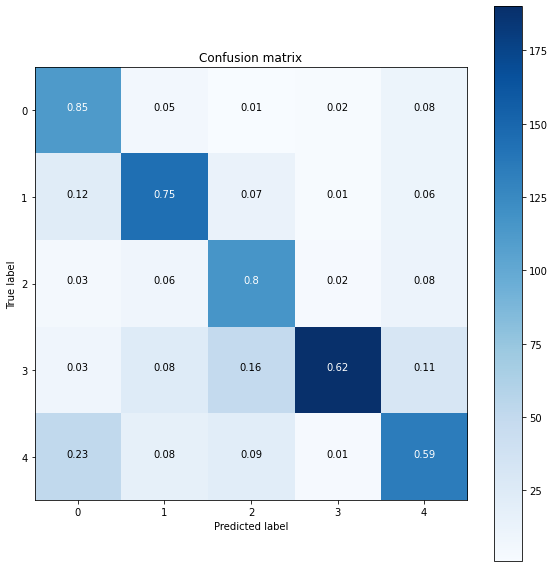

In [78]:
ConfusionMatrix(test_gen, test_gen.classes).plot_confusion_matrix(sklearn.metrics.confusion_matrix(model.predict(x_test.reshape(1000,20)).argmax(axis=1), test_gen.classes), [0,1,2,3,4])

In [ ]:
model_json = model.to_json()
with open("final_model.json", "w") as json_file:
  json_file.write(model_json) 

model.save_weights("final_model.h5")

In [ ]:
models[0].predict(test_gen)[0]

array([8.5980004e-01, 7.5622797e-03, 2.6141654e-04, 4.1392231e-03,
       1.2823699e-01], dtype=float32)

In [ ]:
# if os.path.exists(MODEL_CP_PATH+'saved_model.pb'): # loads saved model in case of a disconnection
#   print("Loading saved model from drive.")
#   model = tf.keras.models.load_model(MODEL_CP_PATH)
# else:
#   model = model_builder()

# conf_matrix_plotter = ConfusionMatrix(test_gen, test_gen.classes);
# live_loss_plotter = PlotLossesKeras()
# csv_logger = tf.keras.callbacks.CSVLogger(MODEL_CP_PATH+"model_history_log.csv", separator=",", append=True)

# training_callbacks = [
#   tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                                 patience=3, min_lr=0.0001),
#   tf.keras.callbacks.ModelCheckpoint(
#       MODEL_CP_PATH, monitor='val_loss', verbose=0, save_best_only=False,
#       save_weights_only=False, mode='auto', save_freq='epoch',
#       options=None
#   ),
#   csv_logger,
#   conf_matrix_plotter, # Confusion matrix
#   live_loss_plotter,   # Accuracy and loss graphs
#   tf.keras.callbacks.TensorBoard(
#     log_dir=LOGS_PATH, histogram_freq=1, write_graph=True,
#     write_images=False, update_freq='epoch', profile_batch=2,
#     embeddings_freq=0, embeddings_metadata=None
#   )
# ]

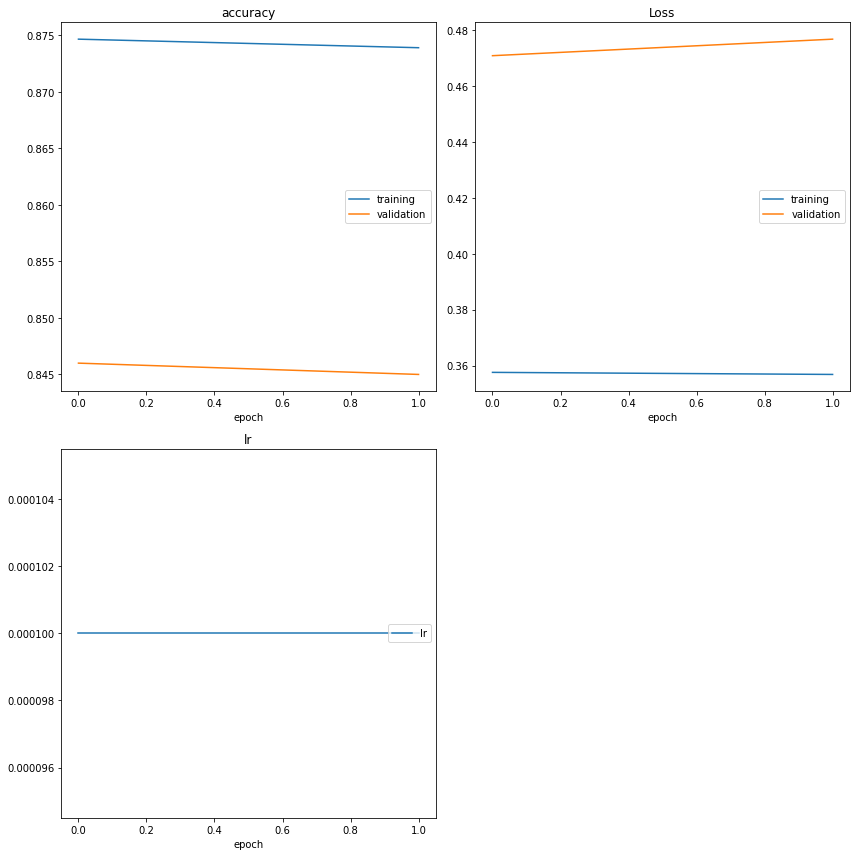

accuracy
	training         	 (min:    0.874, max:    0.875, cur:    0.874)
	validation       	 (min:    0.845, max:    0.846, cur:    0.845)
Loss
	training         	 (min:    0.357, max:    0.358, cur:    0.357)
	validation       	 (min:    0.471, max:    0.477, cur:    0.477)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)
Epoch 3/30
 373/2024 [====>.........................] - ETA: 16:20 - loss: 0.3658 - accuracy: 0.8697

In [ ]:
# history = model.fit(train_gen,
#                     steps_per_epoch=train_gen.n // BATCH_SIZE,
#                     validation_data=test_gen,
#                     epochs=EPOCHS_TO_TRAIN,
#                     callbacks = training_callbacks)

In [ ]:
model_json = model.to_json()
with open(MODEL_CP_PATH+"effnet_evaluation_model.json", "w") as json_file:
  json_file.write(model_json)cv 

model.save_weights(MODEL_CP_PATH+"effnet_evaluation_model.h5")